Using TensorFlow backend.


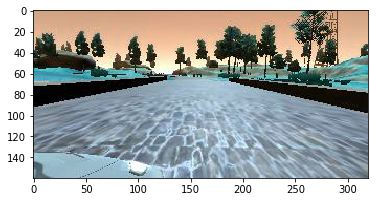

In [1]:
### Import Libraries
import csv
import cv2
import numpy as np
import random
import sklearn
import math

from keras.layers.core import Flatten, Dense, Activation, Lambda
from keras.models import Model, Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.advanced_activations import ELU
import matplotlib.pyplot as plt
%matplotlib inline


lines=[]
images=[]
measurements = []
throttle=[]
brake=[]
speed=[]
steer=[]
center=[]
X_left=[]
leftl=[]
X_right=[]
rightl=[]
left=[]
right=[]
with open("C://Users/matth/Desktop/data/driving_log.csv") as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)
        
for line in lines:
    source_path = line[0]
    
    filename = source_path.split("\\")[-1]
    current_path = "C://Users/matth/Desktop/data/" + filename
    image=cv2.imread(current_path)
    images.append(image)
    center.append(image)
    
    X_left=line[1]
    filename_left=X_left.split("\\")[-1]
    filename_left=filename_left.strip(" ")
    left_path="C://Users/matth/Desktop/data/"+filename_left
    leftl=cv2.imread(left_path)
    left.append(leftl)
    
    X_right=line[2]
    filename_right=X_right.split("\\")[-1]
    filename_right=filename_right.strip(" ")
    right_path="C://Users/matth/Desktop/data/" + filename_right
    rightl=cv2.imread(right_path)
    right.append(rightl)
    
    measurement=line[3]
    throt=line[4]
    braking=line[5]
    speeding=line[6]
    measurements.append(measurement)
    steer.append(measurement)
    throttle.append(throt)
    brake.append(braking)
    speed.append(speeding)




plt.imshow(right[2])


In [2]:
del center[0]
del right[0]
del left[0]
del measurements[0]
del throttle[0]
del steer[0]
del brake[0]
del speed[0]

## Delete all first elements inside a list. First elements equals columns name

In [3]:
print(steer)

[' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0.0617599', ' 0.05219137', ' 0.05219137', ' 0.3679529', ' 0.5784606', ' 0.5784606', ' 0.1670138', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0.08089697', ' 0.0904655', ' 0.0904655', ' 0.1574452', ' 0.1765823', ' 0.1765823', ' 0', ' 0', ' 0', ' -0.0787459', ' -0.0787459', ' -0.0787459', ' -0.0787459', ' 0', ' 0', ' 0', ' 0', ' 0.05219137', ' 0.05219137', ' 0.0904655', ' 0.38709', ' 0.3583844', ' 0.05219137', ' 0', ' 0', ' 0', ' 0', ' 0', ' -0.03127411', ' -0.05975719', ' -0.05975719', ' -0.05975719', ' -0.05975719', ' -0.05975719', ' -0.05975719', ' -0.05975719', ' -0.05975719', ' -0.05975719', ' -0.05975719', ' -0.04076847', ' 0', ' 0', ' 0.01391724', ' 0.01

4451.0


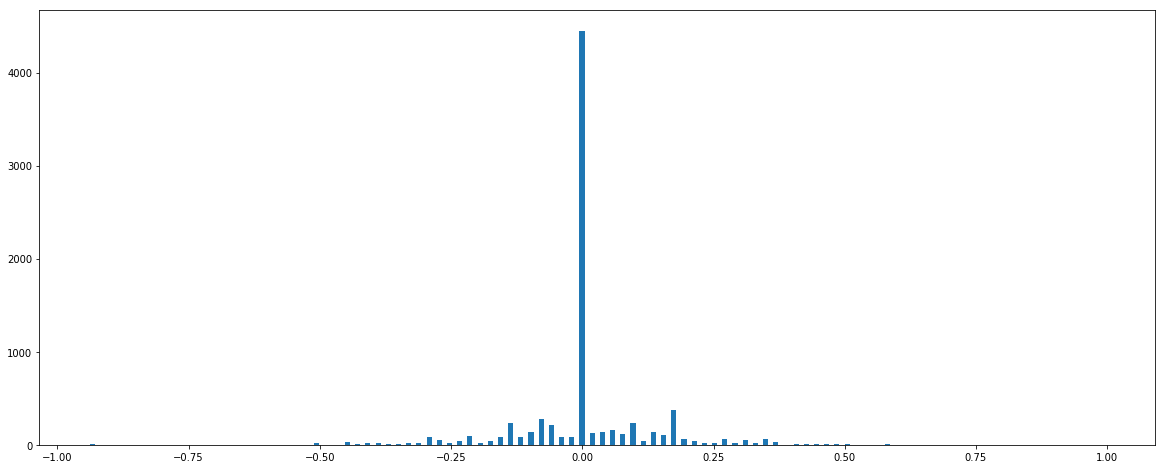

In [4]:
#print((measurements))
meas=[]
sped=[]
brak=[]
throt=[]
plt.figure(figsize=(20,8))
for i in range (1,len(measurements)):
    
    measure=float(measurements[i])
    meas.append(measure)
    
    speede=float(speed[i])
    sped.append(speede)
    
    brakee=float(brake[i])
    brak.append(brakee)
    
    throte=float(throttle[i])
    throt.append(throte)
    

steering_nb=np.arange(len(meas))
#print(len(meas))
k=plt.hist((meas),bins=100,alpha=1,rwidth=0.5)
print(k[0][48])

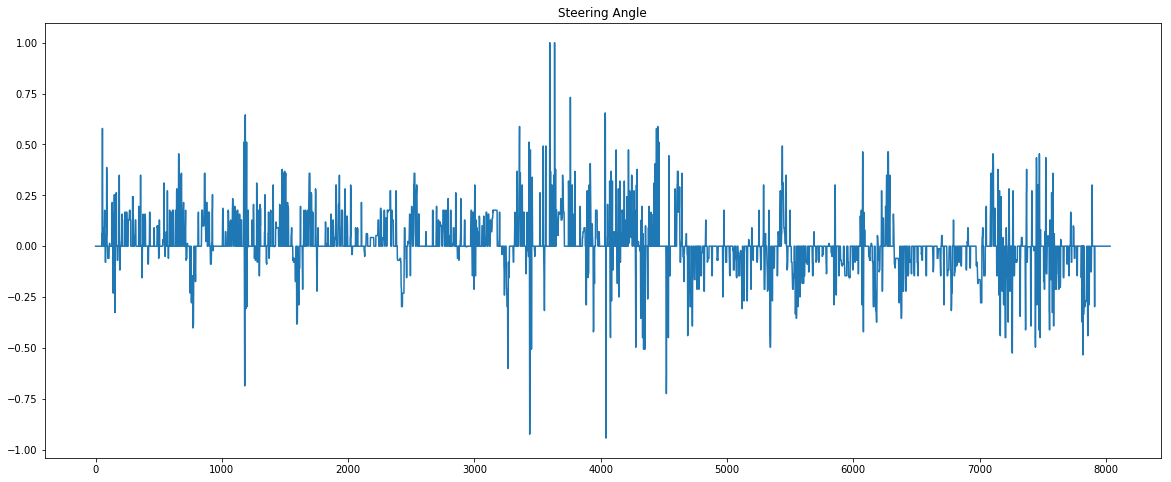

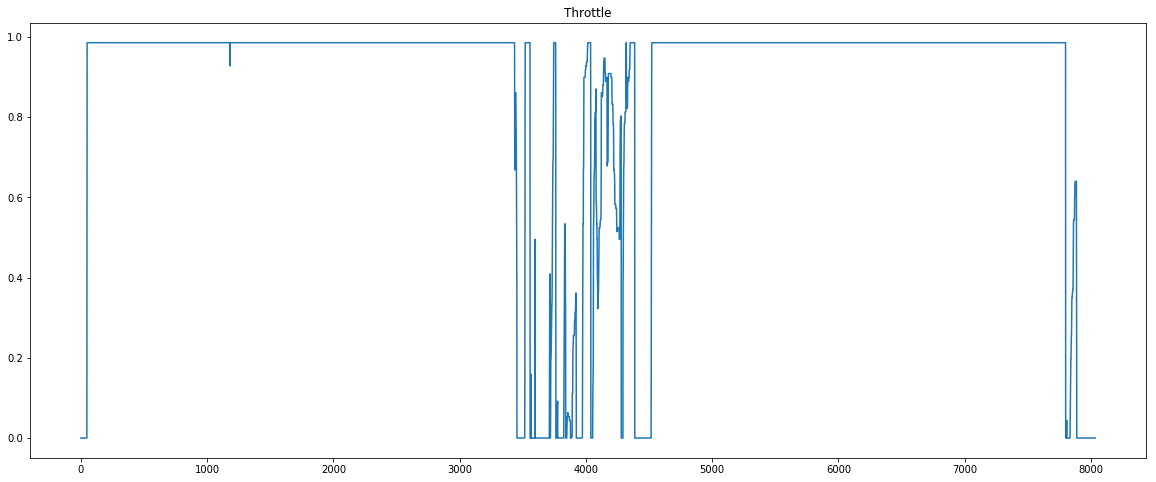

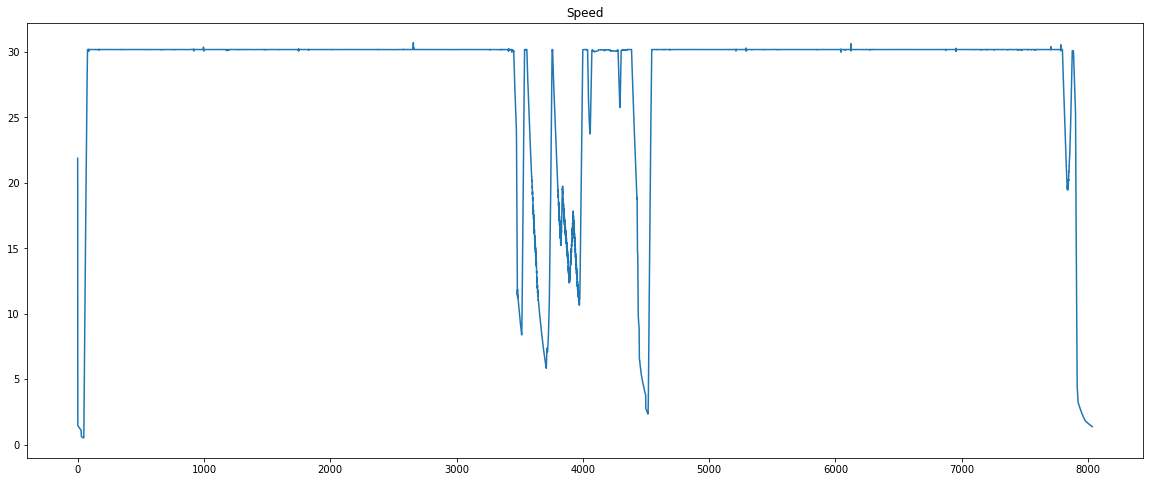

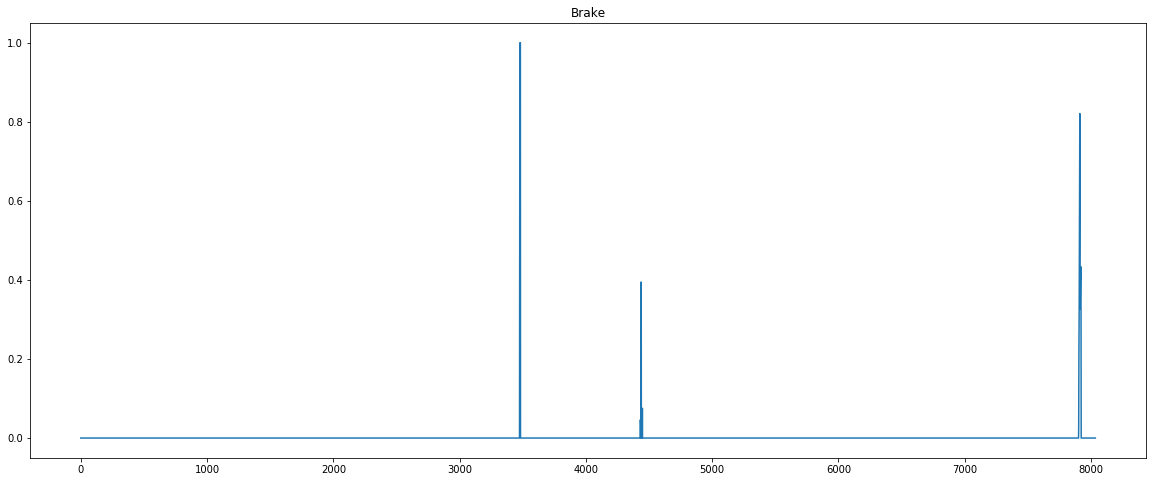

In [5]:
plt.figure(figsize=(20,8))
plt.plot(steering_nb,meas)
plt.title("Steering Angle")

plt.figure(figsize=(20,8))
plt.plot(steering_nb,throt)
plt.title("Throttle")

plt.figure(figsize=(20,8))
plt.plot(steering_nb,sped)
plt.title("Speed")

plt.figure(figsize=(20,8))
plt.plot(steering_nb,brak)
plt.title("Brake")

## Get Index to cut data properly


[]
3880
3880


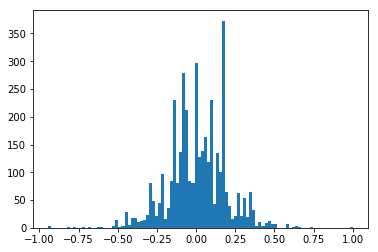

In [6]:
steerr=[]
counter=0
imgs=[]

indices=[]
index0=[]
index=[]

indi=[]
print(index)
factor=15


## Save all Indices which are related to a steering angle of  zero inside a list
for i in range(len(meas)):
    if meas[i]==0.0:
        indek=len(meas[0:i])
        index0.append(indek)
        
## Save all Indices which are not related to a steering angle of  zero inside a list
for i in range(len(meas)):
    if meas[i] <= -0.01 or meas[i] >=0.01: ### former 0.005
        #print(i)
        imgs.append(images[i])
        ind=len(meas[0:i])
        indices.append(ind)
        
## Reduce the amount of steering-angle which equals zero!
for i in range(len(index0)):
    if counter <=((int((k[0][48])/factor))):
        indi.append(index0[i])
        counter+=1
        
## Concatenate all indices
index=indi+indices

## delete 1st element of indices list; First entry equals elements name!
del index[0]

## plot steering_angle in dependency to indices
#for i in index:
for i in range(len(index)):
    angle=meas[index[i]]
    steerr.append(angle)
#print("counter: "+str(counter))
plt.hist(steerr,bins=100)
print(len(index))
print(len(steerr))
#print(steerr)

In [7]:
center[1].shape

(160, 320, 3)

### Image Augmentation

In [8]:
def brightness(img,steering_angle):
    img=cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
    scale=0.4+np.random.uniform(0,1)
    img[:,:,2]=img[:,:,2]*scale
    img=cv2.cvtColor(img,cv2.COLOR_HSV2RGB)
    steer=steering_angle
    return img, steer


def translate(img,steering_angle,tx,ty):
    
    measurement=None
    nb=None
    k=None
    
    rows,cols = img.shape[0],img.shape[1]
    nb=np.random.randint(2,size=1)
    k=np.random.randint(2,size=1)
    
    trans=tx*random.uniform(0,1)
    trans_up=ty*random.uniform(0,1)
    ## horizontally shift
    #print("nb: "+str(nb))
    
    if nb == 0:
        
        
        if k == 0:
            ## shift left
            
            M = np.float32([[1,0,-trans],[0,1,0]])
            
            measurement=float(steering_angle*(1-(trans/cols)*.15))
            
        if k == 1:
            ## shift right
            
            M = np.float32([[1,0,trans],[0,1,0]])
            
            measurement=float(steering_angle*(1+(trans/cols)*.15))
            
        #print('shift '+str(k))
        img = cv2.warpAffine(img,M,(cols,rows))

        
        ### lenkwinkeländerung eintragen
    ## vertical shift
    if nb == 1:
        
        if k == 0:
            ## shift up
            M = np.float32([[1,0,0],[0,1,trans_up]])
            
            measurement=float(steering_angle)
            
        if k == 1:
            ## shift down
            M = np.float32([[1,0,0],[0,1,-trans_up]])
            
            measurement=float(steering_angle)
            
        img = cv2.warpAffine(img,M,(cols,rows))    
    
    return img,measurement


def rot(img,steering_angle):
    rows,cols = img.shape[0],img.shape[1]
    scale=np.random.uniform(0,1)
    angle_rot=10*scale
    k=np.random.randint(low=0,high=2,size=1)
    scale=np.random.uniform(0,1)
    if k == 0:
        ## rot left
        M = cv2.getRotationMatrix2D((cols/2,rows/2),angle_rot,1)
        measurement=float(steering_angle-(angle_rot/360))
        
    if k == 1:
        ## rot right
        M = cv2.getRotationMatrix2D((cols/2,rows/2),-angle_rot,1)
        measurement=float(steering_angle+(angle_rot/360))
    
   
    img = cv2.warpAffine(img,M,(cols,rows))   
    return img, measurement


def crop_image(img,steering_angle):
    crop_img=img[60:140,0:360]
    res = cv2.resize(crop_img,(200, 66), interpolation = cv2.INTER_LINEAR)
    measurement=float(steering_angle)
    return res,measurement



def flip(img,steering_angle):
    k=np.random.randint(1,size=1)
    
    if k == 0:
        img=img
        measurement = float(steering_angle)
    if k == 1:
        img=np.fliplr(img)
        measurement=float(-steering_angle)

    return img, measurement

def createIndex(index,number_of_repetition):
    ind=[]
    for i in range(len(index)):
        for k in range(number_of_repetition):
            ind.append(index[i])
            
        
    return ind

def getIndex(index,center,left,right,steer):
    ctr=[]
    lft=[]
    rght=[]
    stre=[]
    for i in range(len(index)):
    
        centerC=images[index[i]]
        leftL=left[index[i]]
        rightR=right[index[i]]
        steer=meas[index[i]]
    
        ctr.append(centerC)
        lft.append(leftL)
        rght.append(rightR)
        stre.append(float(steer))
    
    center=ctr
    left=lft
    right=rght
    steer=stre
    indd=np.arange(0,len(center))
    
    return center,left,right,steer

def draw_image(index,center, left, right,steer):
    nb=np.random.randint(3,size=1)
    ## left
    if nb == 0:
        image=left[index]
        steering=float((steer[index]))-float((0.25))
    ## center    
    if nb == 1:
        image=center[index]
        steering=float(steer[index])
        
    ## right    
    if nb == 2:
        
        image=right[index]
        steering=float((steer[index])) + float((0.25))
        
    #plt.imshow(image)
    return image,steering

def pipe(img,steering_angle):
    
    imk=(translate(img,steering_angle,0,0))
    bright=brightness(imk[0],imk[1])   
    trans=translate(bright[0],bright[1],10,20)
    rots=rot(trans[0],trans[1])
    flips=flip(rots[0],rots[1])
    image,steer=flips[0],flips[1]
    image,steer=crop_image(image,steer)
    return image,steer

def generator(index,center,left,right,steering_angle, batch_size=32):
    num_samples=len(index)
    np.random.shuffle(index)
    counter=0
    
    
    while 1: # Loop forever so the generator never terminates
        #np.random.shuffle(index)
        images = []
        angles = []
        
        
        for offset in range(0, num_samples, batch_size):
            
            
            batch_samples = index[offset:offset+batch_size]
            

            
            for batch_sample in batch_samples:
                
                image,angle = draw_image(batch_sample,center,left, right,steering_angle)
                img,ang=pipe(image,angle)
                
                
                images.append(img)
                angles.append(float(ang))                
                
            # trim image to only see section with road
            X_train = np.array(images)
            y_train = np.array(angles)
            yield sklearn.utils.shuffle(X_train, y_train)

0


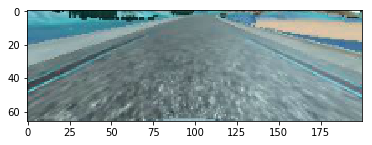

In [9]:
def crop_image(img,steering_angle):
    crop_img=img[60:140,0:360]
    res = cv2.resize(crop_img,(200, 66), interpolation = cv2.INTER_LINEAR)
    measurement=steering_angle
    return res,measurement
images[2].shape
k=crop_image(images[1300],0)
plt.imshow(k[0])
print(k[1])

In [10]:
#center=getIndex(index,center,left,right,steer)[0]
#left=getIndex(index,center,left,right,steer)[1]
#right=getIndex(index,center,left,right,steer)[2]
#print(str(steer)+"steer")
#steer=getIndex(index,center,left,right,steer)[3]
#print(str(steer)+"steer")   
#index=createIndex(index,5)

10.0
10.0
10.010722659524324
9.972177639127862
10.0
10.0
9.992437026070364
9.979668113918494
10.0
9.988041525088772
10.0323540187609
10.040775471918447
10.0
10.0
10.0
10.0
(66, 200, 3)


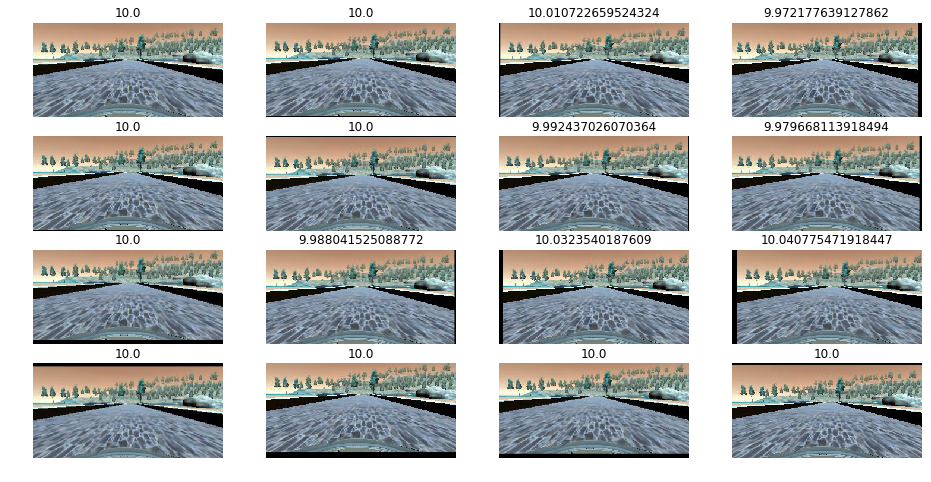

In [11]:
plt.figure(figsize=(16,8))
for i in range(16):
    image1 = translate(images[123],10,10,10)
    print(image1[1])
    plt.subplot(4,4,i+1)
    plt.imshow(image1[0])
    plt.title(str(image1[1]))
    plt.axis('off')
print(crop_image(imgs[123],5)[0].shape)

(66, 200, 3)


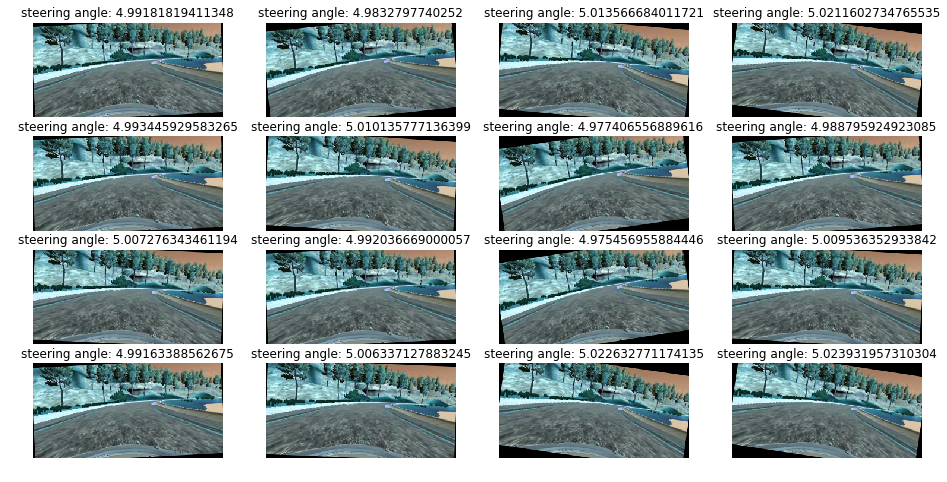

In [12]:
plt.figure(figsize=(16,8))
for i in range(16):
    image1 = rot(images[254],5)
    plt.subplot(4,4,i+1)
    plt.imshow(image1[0])
    plt.title("steering angle: "+str(image1[1]))
    plt.axis('off')
print(crop_image(imgs[123],5)[0].shape)

(66, 200, 3)


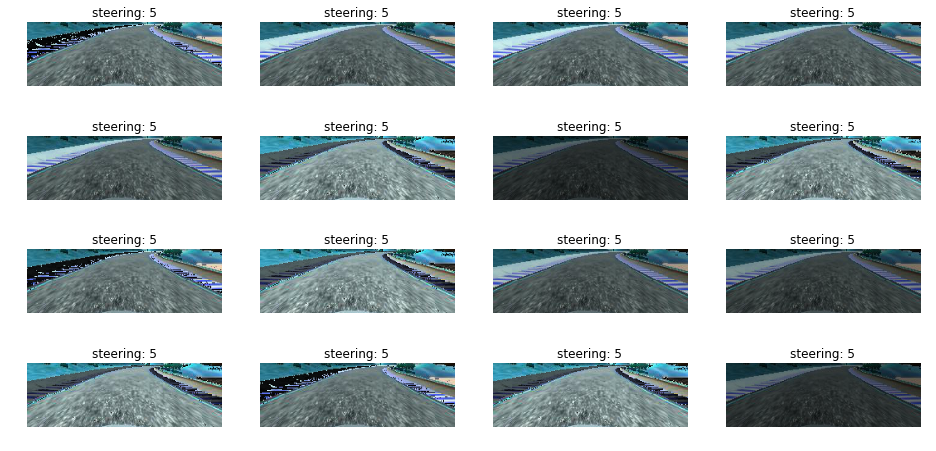

In [13]:
plt.figure(figsize=(16,8))
for i in range(16):
    image1 = crop_image(brightness(imgs[123],5)[0],brightness(imgs[123],5)[1])
    plt.subplot(4,4,i+1)
    plt.imshow(image1[0])
    plt.title("steering: "+str(image1[1]))
    plt.axis('off')
print(crop_image(imgs[123],5)[0].shape)

(66, 200, 3)


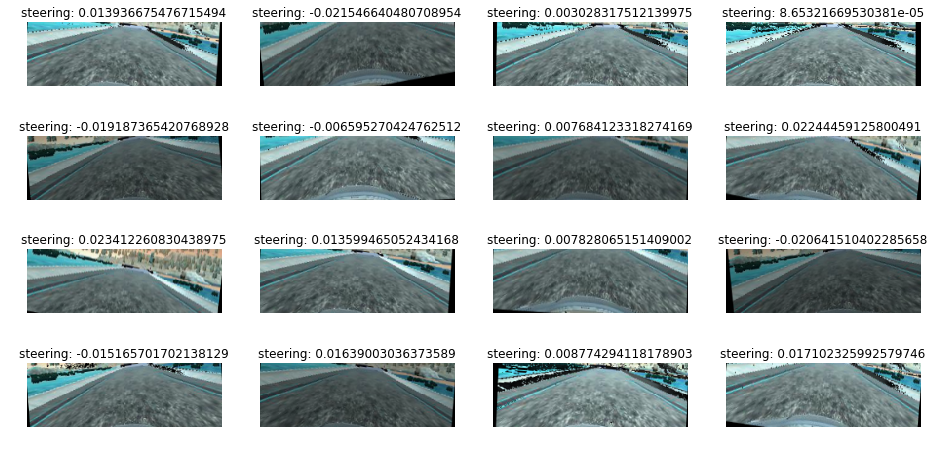

In [14]:
plt.figure(figsize=(16,8))

for i in range(16):
    image1 = pipe(imgs[3],0)
    plt.subplot(4,4,i+1)
    plt.imshow(image1[0])
    plt.title("steering: "+str(image1[1]))
    plt.axis('off')
print(image1[0].shape)



In [15]:
indd=(np.arange(len(center)))
np.random.shuffle(indd)
print((indd[0:32]))
print(index[138])
print(indd)
print(max(index))
print(len(index))


[2443 4964 1220 2576 4126 1967 3064 7809 4250 6555  628  911 1849 7676 6448
 4156 7905 6641 4123 1535 4075 5439 5595 7100 6552 4646 7374 5154 2707 2817
 1446 1080]
228
[2443 4964 1220 ..., 7406 2616 6237]
7912
3880


In [16]:
train_index=createIndex(index,3)
valid_index=createIndex(index,1)
train_size=len(train_index)
print("valid_index percentage: "+str(len(valid_index)/(len(train_index)+len(valid_index))*100)+"%")

valid_index percentage: 25.0%


3880
11640


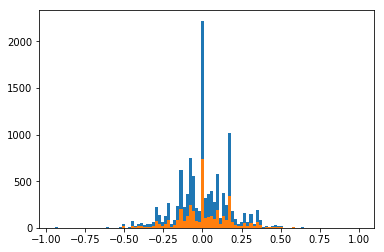

In [17]:
valid_steer=[]
train_steer=[]
#print((steer))
#print(valid_index)
for i in range(len(valid_index)):
    v=float(steer[valid_index[i]])
    valid_steer.append(v)
#print(valid_steer)  

for i in range(len(train_index)):
    t=float(steer[train_index[i]])
    train_steer.append(t)
#print(train_steer)
    
plt.hist(((train_steer)),bins=100)
plt.hist(((valid_steer)),bins=100)
print(len(valid_steer))
print(len(train_steer))

In [18]:
print(train_size/20)

582.0


In [19]:
ttt=generator(train_index,center,left,right,train_steer,batch_size=1250)
type(ttt)
#print((ttt))
next(ttt)
#next(ttt)

[array([[[[ 22,  22,  19],
          [ 93,  95,  81],
          [ 95, 101,  85],
          ..., 
          [192, 163, 135],
          [ 81,  68,  57],
          [  0,   0,   0]],
 
         [[ 28,  28,  25],
          [102, 104,  91],
          [ 99, 102,  87],
          ..., 
          [185, 160, 132],
          [ 63,  55,  46],
          [  0,   0,   0]],
 
         [[ 34,  36,  32],
          [101, 107,  95],
          [ 99, 105,  93],
          ..., 
          [178, 157, 130],
          [ 48,  42,  35],
          [  0,   0,   0]],
 
         ..., 
         [[118, 146, 160],
          [117, 145, 159],
          [117, 145, 159],
          ..., 
          [  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0]],
 
         [[117, 144, 158],
          [115, 143, 157],
          [116, 144, 158],
          ..., 
          [  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0]],
 
         [[107, 136, 150],
          [113, 141, 155],
          [114, 142, 156],

### NvidiaNet

In [29]:
from keras.optimizers import Adam
from keras.layers.convolutional import Conv2D
# compile and train the model using the generator function


nb_batch=45
batch_size=int(train_size/nb_batch)
print(batch_size)
print(len(train_index))
print(len(valid_index))
print(len(valid_index)/batch_size)
train_generator = generator(train_index,center,left,right,steer, batch_size)
validation_generator = generator(valid_index,center,left,right,steer, batch_size)

ch, row, col = 3, 66, 200  # Trimmed image format
#ch,row,col=3,160,320
NVIDIA=Sequential()

NVIDIA.add(Lambda(lambda x: x / 255.0 - 0.5,input_shape=(row,col,ch)))

#NVIDIA.add(Cropping2D(cropping=((70,25),(1,1))))

NVIDIA.add(Conv2D(24, (5, 5), strides=(2, 2), padding="valid"))
NVIDIA.add(ELU())
NVIDIA.add(Conv2D(36, (5, 5), strides=(2, 2), padding="valid"))
NVIDIA.add(ELU())
NVIDIA.add(Conv2D(48, (5, 5), strides=(2, 2), padding="valid"))
NVIDIA.add(ELU())
NVIDIA.add(Conv2D(64, (3, 3), strides=(1, 1),padding="valid"))
NVIDIA.add(ELU())
NVIDIA.add(Conv2D(64, (3, 3), strides=(1, 1),padding="valid"))
NVIDIA.add(ELU())

NVIDIA.add(Flatten())
    
NVIDIA.add(ELU())
NVIDIA.add(Dense(100))
NVIDIA.add(ELU())
    
NVIDIA.add(Dense(50))
NVIDIA.add(ELU())
    
NVIDIA.add(Dense(10))
NVIDIA.add(ELU())
    
NVIDIA.add(Dense(1))
NVIDIA.summary()

# Preprocess incoming data, centered around zero with small standard deviation 



258
11640
3880
15.03875968992248
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_10 (Lambda)           (None, 66, 200, 3)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 31, 98, 24)        1824      
_________________________________________________________________
elu_82 (ELU)                 (None, 31, 98, 24)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 14, 47, 36)        21636     
_________________________________________________________________
elu_83 (ELU)                 (None, 14, 47, 36)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 5, 22, 48)         43248     
_________________________________________________________________
elu_84 (ELU)                 (None, 5, 22, 

In [ ]:
#Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
comp=NVIDIA.compile(optimizer='adam',loss='mse')
history=NVIDIA.fit_generator(generator=train_generator, epochs=1, validation_data=validation_generator,steps_per_epoch=nb_batch
                    ,validation_steps=len(valid_index),verbose=1)

savestate=NVIDIA.save('model.h5')

Epoch 1/1
16/45 [=========>....................] - ETA: 1596s - loss: 0.1942

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()

In [ ]:
print(len(index))
print(len(steer))
print(len(center))
print(len(left))
print(len(right))
print(batch_size)